# Confidence Intervals

In this lecture we will talk about confidence intervals. Confidence intervals provide an alternative to using a point estimator $\hat{\theta}$ when we wish to estimate an unknown population parameter $\theta$. 

In particular, a confidence interval is a random interval, calculated from the sample, that contains $\theta$ with some specified probability. For example, a 95\% confidence interval for $\theta$ is a random interval that contains $\theta$ with probability 0.95.

What does this mean exactly?

The simple answer is that about 95% of the time, the computed confidence interval contains the true value of the population parameter.

In other words, imagine you performed the sampling process 100 times, and each time you computed a confidence interval.  Then you'd expect about 95 of those confidence intervals to include the true value of the population parameter.

Here is an example of such process. Imagine that the populaiton is normally distributed with mean $\mu$ and variance $\sigma$. For instance, we can think of the example of SAT scores that we discussed in the lecture on sampling.

To estimate the true value of $\mu$ we repeat the sampling process 20 times and compute the confidence interval for paramter $\mu$ for each sample. 

In [7]:
rng = default_rng(13)

# Data from 2020 for SAT scores nationwide from above link
mu = 1050
sig = 216
#
# gaussian curve
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (14,10), gridspec_kw={'height_ratios': [2, 7]})
x = np.linspace(norm.ppf(0.001, loc = mu, scale = sig), norm.ppf(0.999, loc = mu, scale = sig), 100)
xmin, xmax = (x[0], x[-1])
ax1.plot(x, norm.pdf(x, loc = mu, scale = sig),'k-', lw = 5, alpha = 0.6)
#
# points under the curve
pop_x = norm.rvs(size = 1000, loc = mu, scale = sig)
pop_y = [uniform.rvs(size = 1, scale = norm.pdf(x_coord, loc = mu, scale = sig)) for x_coord in pop_x]
ax1.scatter(pop_x, pop_y, marker = '.', alpha = 0.5, color = 'darkblue')
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.set_ylabel('Density', size = 16)
ax1.text(1400, np.sum(ax1.get_ylim())/2, 'Population', size = 16, color = 'darkblue')
ax1.set_xlim(xmin, xmax)
# xmin, xmax = ax1.get_xlim()
#
# samples
#
def contains(mu, M, f):
    return (M < (mu + f) and M > (mu - f))

samp_size = 15
t_stat = stats.t.ppf(1-0.025, samp_size - 1)
for samp in range (20):
    samp_x = norm.rvs(size = samp_size, loc = mu, scale = sig, random_state = rng)
    M = np.mean(samp_x)
    std_err = np.std(samp_x) / np.sqrt(samp_size)
    if contains(mu, M, t_stat * std_err):
        col = 'g'
    else:
        col = 'orange'
    #
    ax2.scatter(M, samp, marker = 'o', facecolors = col, edgecolors=col, linewidths = 1.5, s = 64)
    ax2.errorbar(M, samp, xerr = t_stat * std_err, fmt = 'None', ecolor = col, elinewidth = 1.5, capsize = 10, capthick = 1.5)
#
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(-1, 22)
#
ax2.vlines(mu, -1, 20, colors = 'darkblue')
ax2.text(mu, 21, r'$\mu$', size = 20, color = 'darkblue', ha = 'center', va = 'center')
#ax2.text(M+f, 1.75, r'$M + f$', size = 20, color = 'g', ha = 'left', va = 'center')
#ax2.text(M-f, 1.75, r'$M - f$', size = 20, color = 'g', ha = 'right', va = 'center');
ax2.yaxis.set_visible(False)
ax2.xaxis.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)
#
#ax1.set_title('SAT Scores', size=18)
plt.tight_layout(h_pad = -2);



Note how the confidence intervals dance around, and how their sizes vary.
Not every confidence interval contains the population mean $\mu$ -- the orange ones don't. However, roughly 95% of the confidence intervals do contain the true mean.

Now that we understand how to interpret confidence intervals, the next question is how to compute them.

## Confidence Intervals for the Mean of a Normal Distribution

To start with, let's assume that our population has a Gaussian (i.e., normal) distribution.

That is, let $x_1, x_2, ..., x_n$ be a random sample from a population that has a __normal distribution__ with __unknown mean__ $\mu$ and __known variance__ $\sigma^2$. Let 

$$M = \overline{X} = \frac{1}{n} \sum_{i=1}^n x_i.$$ 

For $0 \leq \alpha \leq 1$, let $z(\alpha)$ be that number such that the area under the standard normal density function to the right of $z(\alpha)$ is $\alpha$. Note that the symmetry of the standard normal density function about zero implies that $z(1-\alpha) = -z(\alpha)$.

<center>
    
<img src="images/Standard_normal_density_z.png" width="500px"/>  
    
</center>

<!-- source: J. Rice -->  

If random variable $Z$ follows standard normal distribution, then, by definition of $z(\alpha)$,

$$P\left(-z(\alpha/2) \leq Z \leq z(\alpha/2)\right) = 1-\alpha.$$

We know from the sampling lecture that $\frac{M - \mu}{\sigma/\sqrt{n}}$ has a standard normal distribution, so

$$P\left(-z(\alpha/2) \leq \frac{M - \mu}{\sigma/\sqrt{n}} \leq z(\alpha/2)\right) = 1-\alpha.$$

Elementary manipulation of the inequalities gives 

$$P\left(M - z(\alpha/2) \frac{\sigma}{\sqrt{n}} \leq \mu \leq M + z(\alpha/2)  \frac{\sigma}{\sqrt{n}} \right) = 1-\alpha.$$

This implies that the probability that $\mu$ lies in the interval 

$$\left[M - z(\alpha/2)  \frac{\sigma}{\sqrt{n}}, M + z(\alpha/2)  \frac{\sigma}{\sqrt{n}}\right]$$

is approximately $1-\alpha.$ In other words, this is a _$100(1-\alpha)\%$ confidence interval_ for the population mean, $\mu$.

### Unknown Population Variance

As we have seen so far, when the population is normally distributed and has a known variance $\sigma^2$, finding confidence intervals for population mean  is a relatively straightforward task. However, the population variance, $\sigma^2$, is typically __not known__.

How can we replace it?

Of course, we can estimate $\sigma$ from the data. Since $ \sqrt{\frac{1}{n}\sum_i (x_i - M)^2}$ is known to be a __biased__ estimate of the true standard deviation, we typically apply _Bessel's correction_ to get an __unbiased__ estimate:

$$ s = \sqrt{\frac{1}{n-1}\sum_i (x_i - M)^2}. $$

This substitution has a far-reaching consequence. The distribution of $\frac{M - \mu}{s/\sqrt{n}}$ is a <br>
$t$ _distribution_ with $n-1$ degrees of freedom.

#### The $t$ Distribution

The history of the "t-distrubution" is quite interesting. A man named William Gosset worked at the Guinness Brewery in Ireland. He needed a way to determine if changes in the brewing processes made a difference. Unfortunately, he generally only had small samples sizes.

<center>
    
<img src="images/Guiness.jpg" width="500px"> 
    
</center>

William Gosset realized that he couldn't use the normal distribution for his experiments and introduced the $t$-distribution. This distrubtion has ''fatter'' tails compared to the normal distribution. The thickness of the tails depends on the size of the sample and accounts for a higher probability of observing extreme values in the sample.

<center>
    
<img src="images/Student_t.png" width="500px">
    
</center>

As $\nu$ (the degres of freedom, $\nu=n-1$) goes to infinity, we get the normal distribution.

We shall continue to assume that $x_1, x_2, ..., x_n$ be a random sample from a normal distribution having mean $\mu$ and variance $\sigma^2$. Let $\tau_{n-1}(x)$ denote the PDF of the $t$ distribution with $n-1$ degrees of freedom and $t$ be a constant such that 

$$\int_{-t}^t \tau_{n-1}(x) dx = 1 - \alpha.$$

For every value of $n$, the value of $t$ can be found from the table of the $t$ distribution. For example, if $n = 12$ and $T_{11}(x)$ denotes the CDF of the $t$ distribution with 11 degrees of freedom, then

$$\int_{-t}^t \tau_{11}(x) dx = T_{11}(t) - T_{11}(-t) = T_{11}(t) - (1-T_{11}(t)) = 2T_{11}(t) - 1.$$

If $\alpha = 0.05$, it follows that $T_{11}(t) = 0.975$. It is found from the table that $t = 2.201$, the 0.975 quantile of the $t$ distribution with 11 degrees of freedom.  

Thus, when the population standard deviation $\sigma$ is not known the $100(1-\alpha)\%$ confidence interval becomes 

$$\left[M - t_{n-1}(\alpha/2)  \frac{s}{\sqrt{n}}, M + t_{n-1}(\alpha/2)  \frac{s}{\sqrt{n}}\right].$$ 

Since people often prefer to use the normal distribution, and since the $t$-distribution becomes equivalent to the normal when the sample size $n$ becomes large, common practice is to use normal distribution instead of the $t$-distribution for $n \geq 30$. 

For this course, we recommend using exclusively $t$-distribution when the population standard deviation is not known.

## Confidence Intervals for the Mean of Any Distribution

What happens if the type of the population distribution is not known?

Let $x_1, x_2, ..., x_n$ be a random sample from a population that has an __unknown distribution__ with __unknown mean__ $\mu$ and __known variance__ $\sigma^2$. Let 

$$M = \overline{X} = \frac{1}{n} \sum_{i=1}^n x_i.$$ 

The central limit theorem tells us that the distribution of $\frac{M - \mu}{\sigma/\sqrt{n}}$ can be approximated by a standard normal distribution, so

$$P\left(-z(\alpha/2) \leq \frac{M - \mu}{\sigma/\sqrt{n}} \leq z(\alpha/2)\right) = 1-\alpha.$$

This is the same expression as we found before. Thus, the $100(1-\alpha)\%$ confidence interval is simply 

$$\left[M - z(\alpha/2)  \frac{\sigma}{\sqrt{n}}, M + z(\alpha/2)  \frac{\sigma}{\sqrt{n}}\right].$$

When the sample of size $n$ is from a population that has an __unknown distribution__ with __unknown mean__ $\mu$ and __unknown variance__ $\sigma^2$, the $100(1-\alpha)\%$ confidence interval becomes 

$$\left[M - t_{n-1}(\alpha/2)  \frac{s}{\sqrt{n}}, M + t_{n-1}(\alpha/2)  \frac{s}{\sqrt{n}}\right].$$ 


Here, $s$ is again an unbiased estimate of the true standard deviation.

How large should $n$ be for us to be able to rely on the central limit theorem?

The answer is that it depends on the population distribution. A highly skewed distribution, or one with a large ratio of standard deviation to mean, will require larger sample sizes.

### Visualizing Confidence Intervals

For the SAT example, the figure below shows the 95% confidence intervals for the population mean based on a sample of size 15 and a sample of size 50.

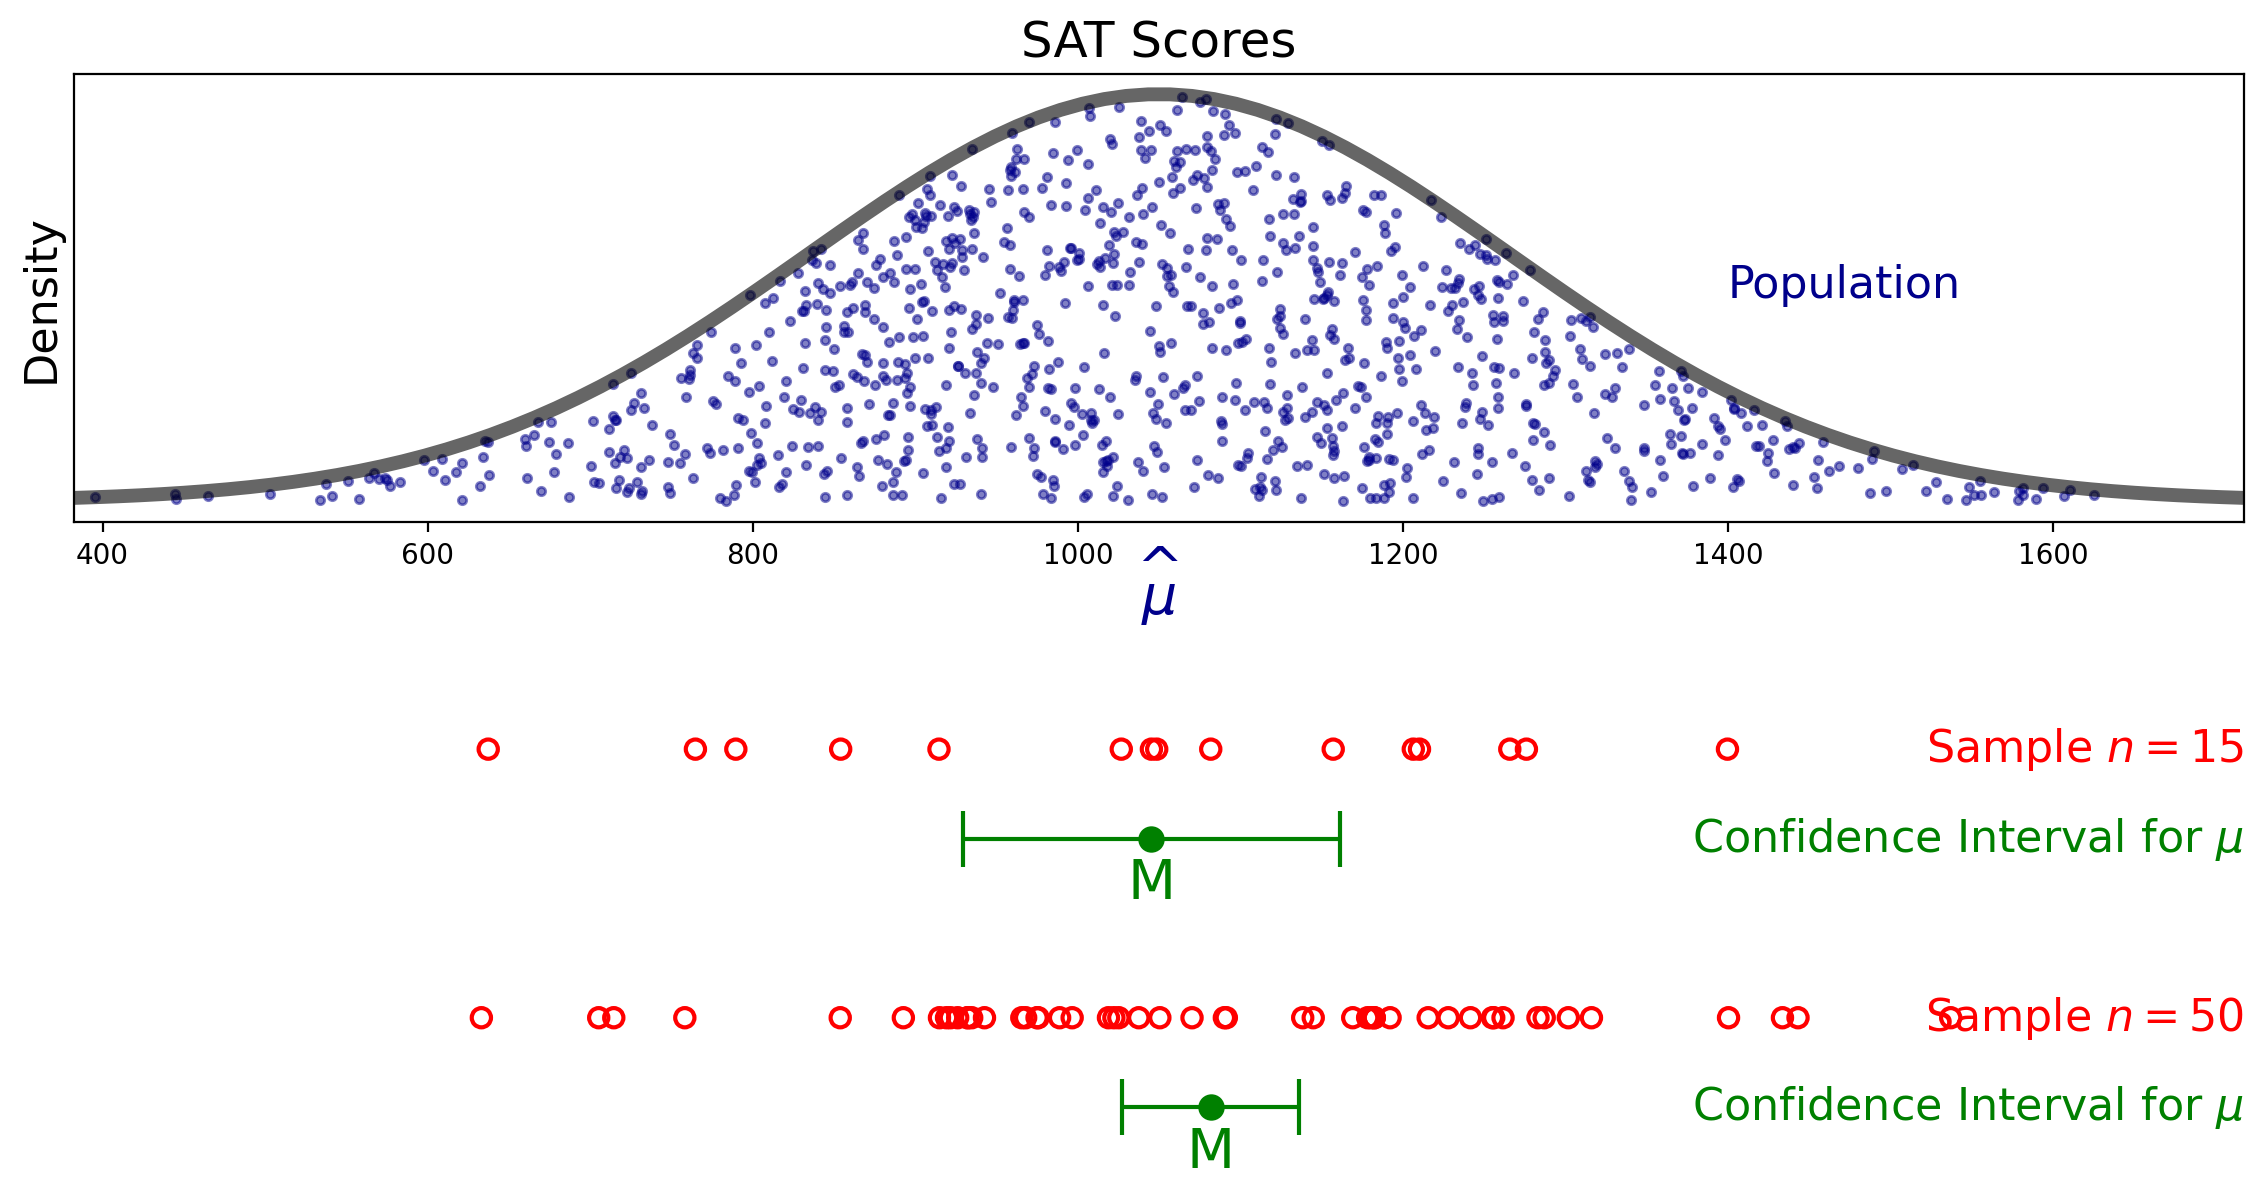

In [8]:
rng = default_rng(12)

# Data from 2020 for SAT scores nationwide from above link
mu = 1050
sig = 216
#
# gaussian curve
fig, (ax1, ax1a, ax2) = plt.subplots(3, 1, figsize = (14,7), gridspec_kw={'height_ratios': [8, 1, 8]})
x = np.linspace(norm.ppf(0.001, loc = mu, scale = sig), norm.ppf(0.999, loc = mu, scale = sig), 100)
xmin, xmax = (x[0], x[-1])
ax1.plot(x, norm.pdf(x, loc = mu, scale = sig),'k-', lw = 5, alpha = 0.6)
#
# points under the curve
pop_x = norm.rvs(size = 1000, loc = mu, scale = sig)
pop_y = [uniform.rvs(size = 1, scale = norm.pdf(x_coord, loc = mu, scale = sig)) for x_coord in pop_x]
ax1.scatter(pop_x, pop_y, marker = '.', alpha = 0.5, color = 'darkblue')
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.set_ylabel('Density', size = 16)
ax1.text(1400, np.sum(ax1.get_ylim())/2, 'Population', size = 16, color = 'darkblue')
ax1.set_xlim(xmin, xmax)
# xmin, xmax = ax1.get_xlim()
#
# sample
#
samp_size = 15
t_stat = stats.t.ppf(1-0.025, samp_size - 1)
samp_x = norm.rvs(size = samp_size, loc = mu, scale = sig, random_state = rng)
samp_y = [2.75 for x in samp_x]
M = np.mean(samp_x)
std_err = np.std(samp_x) / np.sqrt(samp_size)
#
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(0.5, 3)
#
ax2.scatter(samp_x, samp_y, marker = 'o', facecolors='none', edgecolors='red', linewidths = 1.5, s = 48)
ax2.text(xmax, 2.75, 'Sample $n = 15$', size = 16, color = 'red', va = 'center', ha = 'right')
ax2.scatter(M, 2.25, marker = 'o', facecolors = 'g', edgecolors='g', linewidths = 1.5, s = 64)
ax2.errorbar(M, 2.25, xerr = t_stat * std_err, fmt = 'None', ecolor = 'g', elinewidth = 1.5, capsize = 10, capthick = 1.5)
ax2.text(xmax, 2.25, 'Confidence Interval for $\mu$', size = 16, color = 'g', va = 'center', ha = 'right')
ax2.text(M, 2, 'M', size = 20, color = 'g', ha = 'center', va = 'center')
#
samp_size = 50
samp_x = norm.rvs(size = samp_size, loc = mu, scale = sig, random_state = rng)
samp_y = [1.25 for x in samp_x]
M = np.mean(samp_x)
std_err = np.std(samp_x) / np.sqrt(samp_size)
#
ax2.scatter(samp_x, samp_y, marker = 'o', facecolors='none', edgecolors='red', linewidths = 1.5, s = 48)
ax2.text(xmax, 1.25, 'Sample $n = 50$', size = 16, color = 'red', va = 'center', ha = 'right')
ax2.scatter(M, 0.75, marker = 'o', facecolors = 'g', edgecolors='g', linewidths = 1.5, s = 64)
ax2.errorbar(M, 0.75, xerr = 1.96 * std_err, fmt = 'None', ecolor = 'g', elinewidth = 1.5, capsize = 10, capthick = 1.5)
ax2.text(xmax, 0.75, 'Confidence Interval for $\mu$', size = 16, color = 'g', va = 'center', ha = 'right')
ax2.text(M, 0.5, 'M', size = 20, color = 'g', ha = 'center', va = 'center')

#ax2.text(M+f, 1.75, r'$M + f$', size = 20, color = 'g', ha = 'left', va = 'center')
#ax2.text(M-f, 1.75, r'$M - f$', size = 20, color = 'g', ha = 'right', va = 'center');
ax2.yaxis.set_visible(False)
ax2.xaxis.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)
#
ax1a.text(mu, np.sum(ax1a.get_ylim())/2, '$\mu$', size = 20, color = 'darkblue', ha = 'center')
# ax1a.text(mu+sig, np.sum(ax1a.get_ylim())/2, '$\mu+\sigma$', size = 20, color = 'darkblue', ha = 'left')
ax1a.text(mu, ax1a.get_ylim()[1], '^', size = 20, color = 'darkblue', ha = 'center')
# ax1a.text(mu+sig, ax1a.get_ylim()[1], '^', size = 20, color = 'darkblue', ha = 'left')
ax1a.yaxis.set_visible(False)
ax1a.xaxis.set_visible(False)
for spine in ax1a.spines.values():
    spine.set_visible(False)
ax1a.set_xlim(xmin, xmax)
#
ax1.set_title('SAT Scores', size=18);



## Confidence Intervals for the Mean of Any Distribution

<!--- https://online.stat.psu.edu/stat415/lesson/2/2.6 --->

<!--- Also look at this https://math.mit.edu/~dav/05.dir/class23-prep.pdf for handling Bernoulli.  Also return to it in Bayesian section --->

Now, we have so far been assuming that the population is normally distributed.   This may seem like a very limiting assumption.

However, it turns out that in the majority of cases, __the distribution of the population does not matter too much.__

Here is why.

Recall that our sample statistic is

$$ M = \frac{1}{n}\sum_i x_i. $$

Now recall that the Central Limit Theorem tells us that for $n$ large enough, the sum of $n$ samples from __any__ distribution is approximately normally distributed.

A technical limitation: the underlying distribution must have finite variance.  Most distributions you encounter in practice will have this property.

How large should $n$ be for us to be able to rely on the Central Limit Theorem?

The answer is that it depends on the population distribution. A highly skewed distribution, or one with a large ratio of standard deviation to mean, will require larger sample sizes.

## Reporting and Using Confidence Intervals

What is the role of confidence intervals in summarizing data?

The simple answer is __confidence intervals are crucial.__

You cannot communicate with clarity without reporting confidence intervals.

__Any time__ you are reporting a statistic derived from a sample, such as the sample mean, you should report the associated confidence intervals.


Confidence intervals combine information on location and precision.  

They tell you (or your reader) both __how large__ is the quantity (location) and __how much information__ the estimate provides.

There are standard ways for doing this.

In text, it is standard to write in this format:

$M = 30.5 \text{cm, 95% CI } [18.0, 43.0]$

In a table, you should use this format:

|   | height | 95% CI |
|---|---|---|
| men, n = 25 | 69.0 in | [68.1, 69.9]|
| women, n = 23 | 61.1 in | [60.2, 62.0] |

In this lecture we've computed 95% confidence intervals.   Some statisticians will suggest that you may want to use a different confidence level depending on the setting.

If your results will be used to make life-or-death decisions, perhaps a 99% or even a 99.9% confidence interval should be used.  

On the other hand, if we are not so concerned about an occasional miss, perhaps a 90% or 80% confidence interval should be used. 

These are reasonable considerations, but in general work it's probably best to stick with 95% confidence intervals for consistency and ease of interpretation.